In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df_item_lookup = pd.read_csv("item_lookup.csv", encoding='latin-1')
df_fetch_requests = pd.read_csv("lou_mes_retrieval_requests.csv")
df_workbench_jobs = pd.read_csv("lou_workbench_jobs.csv")

In [3]:
df_fetch_requests.head()

,ORG,Line,SKU,FROM_LOCATION,TO_LOCATION,INSERT_DTTM,COMPLETE_DTTM,TRANSPORT_ORDER_TYPE,Duration_in_Minutes
0,LOU,LOU1,SHV02RED0540DRN1,RDD.SSR.031.01.05,RDD.RAW.HOFF.L1,2024-02-15 05:04:41,2024-02-15 05:13:52,Retrieval Request from Mes,9.183333
1,LOU,LOU1,LKRG05DRNNV04RAI,RDD.RSR.N.07.01,RDD.RAW.HOFF.L1,2024-02-15 07:56:19,2024-02-15 08:05:24,Retrieval Request from Mes,9.083333
2,LOU,LOU1,SHV05GRV0540DMN,RDD.RSR.N.09.05,RDD.RAW.HOFF.L1,2024-02-15 10:52:02,2024-02-15 11:06:17,Retrieval Request from Mes,14.250000
3,LOU,LOU5,RM01805,RDD.SSR.014.01.04,RDD.RAW.HOFF.L5,2024-02-15 11:24:36,2024-02-15 12:28:18,Retrieval Request from Mes,63.700000
4,LOU,LOU1,SHV02RED0540DRN1,RDD.SSR.041.01.05,RDD.RAW.HOFF.L1,2024-02-15 12:55:23,2024-02-15 13:17:23,Retrieval Request from Mes,22.000000


In [4]:
df_fetch_requests.head()

,ORG,Line,SKU,FROM_LOCATION,TO_LOCATION,INSERT_DTTM,COMPLETE_DTTM,TRANSPORT_ORDER_TYPE,Duration_in_Minutes
0,LOU,LOU1,SHV02RED0540DRN1,RDD.SSR.031.01.05,RDD.RAW.HOFF.L1,2024-02-15 05:04:41,2024-02-15 05:13:52,Retrieval Request from Mes,9.183333
1,LOU,LOU1,LKRG05DRNNV04RAI,RDD.RSR.N.07.01,RDD.RAW.HOFF.L1,2024-02-15 07:56:19,2024-02-15 08:05:24,Retrieval Request from Mes,9.083333
2,LOU,LOU1,SHV05GRV0540DMN,RDD.RSR.N.09.05,RDD.RAW.HOFF.L1,2024-02-15 10:52:02,2024-02-15 11:06:17,Retrieval Request from Mes,14.250000
3,LOU,LOU5,RM01805,RDD.SSR.014.01.04,RDD.RAW.HOFF.L5,2024-02-15 11:24:36,2024-02-15 12:28:18,Retrieval Request from Mes,63.700000
4,LOU,LOU1,SHV02RED0540DRN1,RDD.SSR.041.01.05,RDD.RAW.HOFF.L1,2024-02-15 12:55:23,2024-02-15 13:17:23,Retrieval Request from Mes,22.000000


In [5]:
df_item_lookup.head()

,item,item_type,description
0,RM02296,LABL,RM02296 Label: Sparkling Ice 17oz Grape Raspbe...
1,FLAPHYWHTCLDV01,INGR,Flavors: White Cloud FASN292 (40LB Pail)
2,SHV02GGZ0524DRN,SHRF,Shrink Film:Northgate Gonzalez DR 0.5L24pk Nes...
3,CTJOJ8Z12PBAHAMV01,CORR,Corrugate: Joint Juice 8oz 12pk Blueberry Acai...
4,LCKK10ZBBS19V01CV,LABL,Label: Kids' Koolers 10oz Berry Blue F Cut-Sta...


In [6]:
df_workbench_jobs.head()

,ORG,PROD_LINE,JOB_NUMBER,ITEM_NUMBER,ITEM_DESCRIPTION,QUANTITY,ACTUAL_QUANTITY,ACTUAL_START_TIME,PLANNED_START_TIME,UOM
0,LOU,LOU1,L00884024,MMK05L40PDMCHNR02,05L.DM.MEMBER'S MARK 20% RPET.40P.N.48.CH,25344.0,25386,2024-01-02 13:37:50,2023-12-31 01:00:00,case
1,LOU,LOU3,2605949_72,DSN05L24PDMRTN,707303 05L.DM.DASANI.24P.N.84.RT,57624.0,53915,2024-01-03 10:49:45,2024-01-02 15:00:00,case
2,LOU,LOU2,L00885584,NDW05L24PDRCHN84,05L.DR.NIAGARA NEW FILM.24P.N.84.CH,5124.0,5128,2024-01-02 15:37:50,2024-01-02 20:32:00,case
3,LOU,LOU2,L00886616,CRF05L24PDRCHN,05L.DR.CRYSTAL FALLS.24P.N.84.CH,7952.0,7982,2024-01-02 18:03:23,2024-01-02 20:35:00,case
4,LOU,LOU2,L00885000,NDW05L24PDRPBN84,05L.DR.NIAGARA NEW FILM.24P.N.84.PB,14220.0,14227,2024-01-02 20:58:45,2024-01-03 01:40:00,case


In [7]:
df_fetch_requests = pd.merge(df_item_lookup, df_fetch_requests, left_on='item', right_on='SKU', how='inner')

In [8]:
df_fetch_requests.head()
df_fetch_requests = df_fetch_requests[["Line", "item", "item_type", "FROM_LOCATION", "TO_LOCATION", "INSERT_DTTM", "COMPLETE_DTTM", "Duration_in_Minutes"]]

In [9]:
df_fetch_requests.head()

,Line,item,item_type,FROM_LOCATION,TO_LOCATION,INSERT_DTTM,COMPLETE_DTTM,Duration_in_Minutes
0,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.166666
1,LOU4,RM02296,LABL,RDD.RSR.N.14.03,RDD.RAW.HOFF.L4,2024-10-08 05:26:26,2024-10-08 06:31:48,65.366666
2,LOU4,RM02296,LABL,RDD.RSR.N.01.05,RDD.RAW.HOFF.L4,2024-08-01 18:08:49,2024-08-01 18:15:24,6.583333
3,LOU4,RM02296,LABL,RDD.RSR.N.14.03,RDD.RAW.HOFF.L4,2024-08-01 19:09:50,2024-08-01 19:14:37,4.783333
4,LOU3,SHV08KRG0524DRN1,SHRF,RDD.SSR.038.03.05,RDD.RAW.HOFF.L3,2024-05-24 22:00:34,2024-05-24 22:58:17,57.716666


In [10]:
df_fetch_requests["Duration_in_Minutes"].sort_values(ascending=False)

6841    2346.683333
3734    1369.416666
1387    1347.216666
6885    1252.233333
3758     992.600000
           ...     
7448       4.416666
8560       4.316666
4608       4.283333
3416       4.250000
3010       4.150000
Name: Duration_in_Minutes, Length: 11039, dtype: float64

<Axes: xlabel='Duration_in_Minutes', ylabel='Count'>

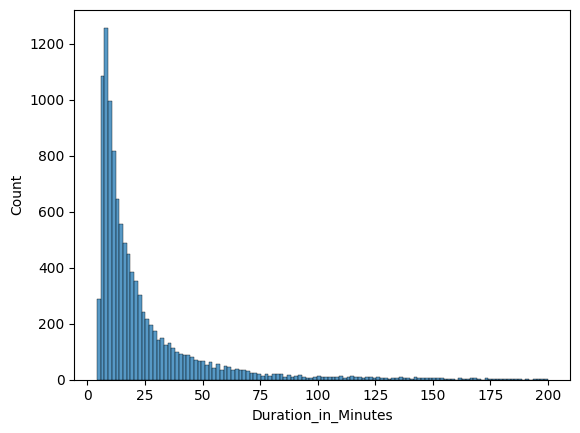

In [11]:
sns.histplot(df_fetch_requests["Duration_in_Minutes"][df_fetch_requests["Duration_in_Minutes"] < 200])

In [12]:
log_minutes = np.log10(df_fetch_requests.Duration_in_Minutes)

Text(0.5, 0, 'Log_10(Duration_in_Minutes)')

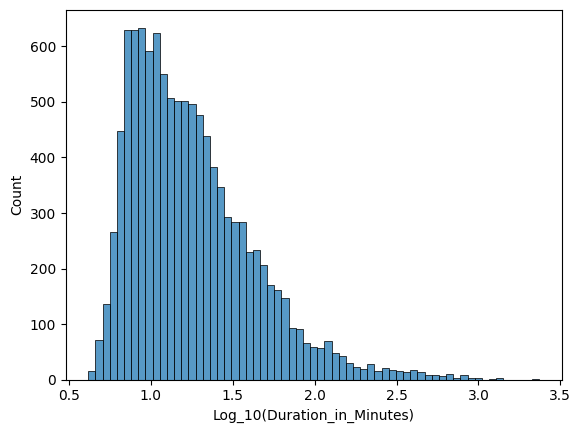

In [13]:
sns.histplot(log_minutes)
plt.xlabel("Log_10(Duration_in_Minutes)")

In [14]:
#df_fetch_requests["INSERT_DTTM"].to_datetime()
df_fetch_requests["INSERT_DATE"] = pd.to_datetime(df_fetch_requests["INSERT_DTTM"]).dt.date
df_fetch_requests["COMPLETE_DATE"] = pd.to_datetime(df_fetch_requests["COMPLETE_DTTM"]).dt.date

In [15]:
df_fetch_requests

,Line,item,item_type,FROM_LOCATION,TO_LOCATION,INSERT_DTTM,COMPLETE_DTTM,Duration_in_Minutes,INSERT_DATE,COMPLETE_DATE
0,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.166666,2024-06-02,2024-06-02
1,LOU4,RM02296,LABL,RDD.RSR.N.14.03,RDD.RAW.HOFF.L4,2024-10-08 05:26:26,2024-10-08 06:31:48,65.366666,2024-10-08,2024-10-08
2,LOU4,RM02296,LABL,RDD.RSR.N.01.05,RDD.RAW.HOFF.L4,2024-08-01 18:08:49,2024-08-01 18:15:24,6.583333,2024-08-01,2024-08-01
3,LOU4,RM02296,LABL,RDD.RSR.N.14.03,RDD.RAW.HOFF.L4,2024-08-01 19:09:50,2024-08-01 19:14:37,4.783333,2024-08-01,2024-08-01
4,LOU3,SHV08KRG0524DRN1,SHRF,RDD.SSR.038.03.05,RDD.RAW.HOFF.L3,2024-05-24 22:00:34,2024-05-24 22:58:17,57.716666,2024-05-24,2024-05-24
...,...,...,...,...,...,...,...,...,...,...
11034,LOU2,SHV01CLR19175C,SHRF,RDD.SSR.030.02.04,RDD.RAW.HOFF.L2,2024-04-01 07:46:44,2024-04-01 07:53:59,7.250000,2024-04-01,2024-04-01
11035,LOU3,SHV01CLR19175C,SHRF,RDD.RSR.N.27.01,RDD.RAW.HOFF.L3,2024-04-24 04:51:19,2024-04-24 04:57:00,5.683333,2024-04-24,2024-04-24
11036,LOU3,SHV01CLR19175C,SHRF,RDD.RSR.N.05.01,RDD.RAW.HOFF.L3,2024-01-22 18:31:11,2024-01-22 19:04:34,33.383333,2024-01-22,2024-01-22
11037,LOU2,SHV01CLR19175C,SHRF,RDD.SSR.016.03.04,RDD.RAW.HOFF.L2,2024-01-23 08:19:53,2024-01-23 10:10:15,110.366666,2024-01-23,2024-01-23


In [16]:
df_produced = pd.read_csv("lou_total_cases_produced.csv")
df_produced["Date"] = pd.to_datetime(df_produced["Date"], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
df_produced

,ORG,Prod_Line,Date,Total_Cases_Produced
0,LOU,LOU1,2024-01-02,39555
1,LOU,LOU2,2024-01-02,27337
2,LOU,LOU1,2024-01-03,56233
3,LOU,LOU2,2024-01-03,104646
4,LOU,LOU3,2024-01-03,53915
...,...,...,...,...
1551,LOU,LOU2,2025-03-11,9669
1552,LOU,LOU4,2025-03-11,522641
1553,LOU,LOU5,2025-03-11,13881
1554,LOU,LOU2,2025-03-12,54734


In [17]:
df_shipped = pd.read_csv('lou_total_cases_shipped.csv')
df_shipped["SHIPPED_DATE"] = pd.to_datetime(df_shipped["SHIPPED_DATE"], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
df_shipped

,ORG,SHIPPED_DATE,Total_Cases_Shipped
0,LOU,2024-01-02,137364
1,LOU,2024-01-03,190267
2,LOU,2024-01-04,211188
3,LOU,2024-01-05,239556
4,LOU,2024-01-06,213624
...,...,...,...
430,LOU,2025-03-08,199623
431,LOU,2025-03-09,177684
432,LOU,2025-03-10,179038
433,LOU,2025-03-11,234156


In [18]:
df_fetch_requests["INSERT_DATE"] = pd.to_datetime(df_fetch_requests["INSERT_DATE"])
df_fetch_requests["COMPLETE_DATE"] = pd.to_datetime(df_fetch_requests["COMPLETE_DATE"])
df_fetch_requests["INSERT_DTTM"] = pd.to_datetime(df_fetch_requests["INSERT_DTTM"])
df_fetch_requests["COMPLETE_DTTM"] = pd.to_datetime(df_fetch_requests["COMPLETE_DTTM"])
#df_fetch_requests.dtypes

In [19]:
df_produced["Date"] = pd.to_datetime(df_produced["Date"])
df_shipped["SHIPPED_DATE"] = pd.to_datetime(df_shipped["SHIPPED_DATE"])

In [20]:
df_fetch_requests = pd.merge(df_fetch_requests, df_produced, left_on='INSERT_DATE', right_on='Date', how='left')
df_fetch_requests

,Line,item,item_type,FROM_LOCATION,TO_LOCATION,INSERT_DTTM,COMPLETE_DTTM,Duration_in_Minutes,INSERT_DATE,COMPLETE_DATE,ORG,Prod_Line,Date,Total_Cases_Produced
0,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.166666,2024-06-02,2024-06-02,LOU,LOU1,2024-06-02,107705.0
1,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.166666,2024-06-02,2024-06-02,LOU,LOU2,2024-06-02,80561.0
2,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.166666,2024-06-02,2024-06-02,LOU,LOU4,2024-06-02,78360.0
3,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.166666,2024-06-02,2024-06-02,LOU,LOU5,2024-06-02,128212.0
4,LOU4,RM02296,LABL,RDD.RSR.N.14.03,RDD.RAW.HOFF.L4,2024-10-08 05:26:26,2024-10-08 06:31:48,65.366666,2024-10-08,2024-10-08,LOU,LOU1,2024-10-08,25220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40448,LOU2,SHV01CLR19175C,SHRF,RDD.SSR.016.03.04,RDD.RAW.HOFF.L2,2024-01-23 08:19:53,2024-01-23 10:10:15,110.366666,2024-01-23,2024-01-23,LOU,LOU5,2024-01-23,46429.0
40449,LOU3,SHV01CLR19175C,SHRF,RDD.RSR.N.29.02,RDD.RAW.HOFF.L3,2024-05-10 11:40:16,2024-05-10 12:33:37,53.350000,2024-05-10,2024-05-10,LOU,LOU1,2024-05-10,175594.0
40450,LOU3,SHV01CLR19175C,SHRF,RDD.RSR.N.29.02,RDD.RAW.HOFF.L3,2024-05-10 11:40:16,2024-05-10 12:33:37,53.350000,2024-05-10,2024-05-10,LOU,LOU2,2024-05-10,25390.0
40451,LOU3,SHV01CLR19175C,SHRF,RDD.RSR.N.29.02,RDD.RAW.HOFF.L3,2024-05-10 11:40:16,2024-05-10 12:33:37,53.350000,2024-05-10,2024-05-10,LOU,LOU3,2024-05-10,112420.0


In [21]:
df_fetch_requests = pd.merge(df_fetch_requests, df_shipped, left_on='INSERT_DATE', right_on='SHIPPED_DATE', how='inner')
df_fetch_requests

,Line,item,item_type,FROM_LOCATION,TO_LOCATION,INSERT_DTTM,COMPLETE_DTTM,Duration_in_Minutes,INSERT_DATE,COMPLETE_DATE,ORG_x,Prod_Line,Date,Total_Cases_Produced,ORG_y,SHIPPED_DATE,Total_Cases_Shipped
0,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.166666,2024-06-02,2024-06-02,LOU,LOU1,2024-06-02,107705.0,LOU,2024-06-02,256696
1,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.166666,2024-06-02,2024-06-02,LOU,LOU2,2024-06-02,80561.0,LOU,2024-06-02,256696
2,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.166666,2024-06-02,2024-06-02,LOU,LOU4,2024-06-02,78360.0,LOU,2024-06-02,256696
3,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.166666,2024-06-02,2024-06-02,LOU,LOU5,2024-06-02,128212.0,LOU,2024-06-02,256696
4,LOU4,RM02296,LABL,RDD.RSR.N.14.03,RDD.RAW.HOFF.L4,2024-10-08 05:26:26,2024-10-08 06:31:48,65.366666,2024-10-08,2024-10-08,LOU,LOU1,2024-10-08,25220.0,LOU,2024-10-08,222420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40448,LOU2,SHV01CLR19175C,SHRF,RDD.SSR.016.03.04,RDD.RAW.HOFF.L2,2024-01-23 08:19:53,2024-01-23 10:10:15,110.366666,2024-01-23,2024-01-23,LOU,LOU5,2024-01-23,46429.0,LOU,2024-01-23,184800
40449,LOU3,SHV01CLR19175C,SHRF,RDD.RSR.N.29.02,RDD.RAW.HOFF.L3,2024-05-10 11:40:16,2024-05-10 12:33:37,53.350000,2024-05-10,2024-05-10,LOU,LOU1,2024-05-10,175594.0,LOU,2024-05-10,224328
40450,LOU3,SHV01CLR19175C,SHRF,RDD.RSR.N.29.02,RDD.RAW.HOFF.L3,2024-05-10 11:40:16,2024-05-10 12:33:37,53.350000,2024-05-10,2024-05-10,LOU,LOU2,2024-05-10,25390.0,LOU,2024-05-10,224328
40451,LOU3,SHV01CLR19175C,SHRF,RDD.RSR.N.29.02,RDD.RAW.HOFF.L3,2024-05-10 11:40:16,2024-05-10 12:33:37,53.350000,2024-05-10,2024-05-10,LOU,LOU3,2024-05-10,112420.0,LOU,2024-05-10,224328


In [22]:
df_fetch_requests = df_fetch_requests[["Line","item","item_type","FROM_LOCATION","TO_LOCATION","INSERT_DTTM","COMPLETE_DTTM","Duration_in_Minutes","INSERT_DATE","COMPLETE_DATE","Total_Cases_Produced","Total_Cases_Shipped"]]

In [23]:
df_fetch_requests.columns = df_fetch_requests.columns.str.lower().str.replace(' ', '_')

In [24]:
df_fetch_requests = df_fetch_requests.rename(columns={"total_cases_produced": "total_cases_produced_for_day","total_cases_shipped": "total_cases_shipped_for_day", "test":"line"})
df_fetch_requests

,line,item,item_type,from_location,to_location,insert_dttm,complete_dttm,duration_in_minutes,insert_date,complete_date,total_cases_produced_for_day,total_cases_shipped_for_day
0,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.166666,2024-06-02,2024-06-02,107705.0,256696
1,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.166666,2024-06-02,2024-06-02,80561.0,256696
2,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.166666,2024-06-02,2024-06-02,78360.0,256696
3,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.166666,2024-06-02,2024-06-02,128212.0,256696
4,LOU4,RM02296,LABL,RDD.RSR.N.14.03,RDD.RAW.HOFF.L4,2024-10-08 05:26:26,2024-10-08 06:31:48,65.366666,2024-10-08,2024-10-08,25220.0,222420
...,...,...,...,...,...,...,...,...,...,...,...,...
40448,LOU2,SHV01CLR19175C,SHRF,RDD.SSR.016.03.04,RDD.RAW.HOFF.L2,2024-01-23 08:19:53,2024-01-23 10:10:15,110.366666,2024-01-23,2024-01-23,46429.0,184800
40449,LOU3,SHV01CLR19175C,SHRF,RDD.RSR.N.29.02,RDD.RAW.HOFF.L3,2024-05-10 11:40:16,2024-05-10 12:33:37,53.350000,2024-05-10,2024-05-10,175594.0,224328
40450,LOU3,SHV01CLR19175C,SHRF,RDD.RSR.N.29.02,RDD.RAW.HOFF.L3,2024-05-10 11:40:16,2024-05-10 12:33:37,53.350000,2024-05-10,2024-05-10,25390.0,224328
40451,LOU3,SHV01CLR19175C,SHRF,RDD.RSR.N.29.02,RDD.RAW.HOFF.L3,2024-05-10 11:40:16,2024-05-10 12:33:37,53.350000,2024-05-10,2024-05-10,112420.0,224328


In [25]:
df_fetch_requests["duration_in_minutes"] = df_fetch_requests["duration_in_minutes"].round(2)

In [26]:
df_fetch_requests

,line,item,item_type,from_location,to_location,insert_dttm,complete_dttm,duration_in_minutes,insert_date,complete_date,total_cases_produced_for_day,total_cases_shipped_for_day
0,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.17,2024-06-02,2024-06-02,107705.0,256696
1,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.17,2024-06-02,2024-06-02,80561.0,256696
2,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.17,2024-06-02,2024-06-02,78360.0,256696
3,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.17,2024-06-02,2024-06-02,128212.0,256696
4,LOU4,RM02296,LABL,RDD.RSR.N.14.03,RDD.RAW.HOFF.L4,2024-10-08 05:26:26,2024-10-08 06:31:48,65.37,2024-10-08,2024-10-08,25220.0,222420
...,...,...,...,...,...,...,...,...,...,...,...,...
40448,LOU2,SHV01CLR19175C,SHRF,RDD.SSR.016.03.04,RDD.RAW.HOFF.L2,2024-01-23 08:19:53,2024-01-23 10:10:15,110.37,2024-01-23,2024-01-23,46429.0,184800
40449,LOU3,SHV01CLR19175C,SHRF,RDD.RSR.N.29.02,RDD.RAW.HOFF.L3,2024-05-10 11:40:16,2024-05-10 12:33:37,53.35,2024-05-10,2024-05-10,175594.0,224328
40450,LOU3,SHV01CLR19175C,SHRF,RDD.RSR.N.29.02,RDD.RAW.HOFF.L3,2024-05-10 11:40:16,2024-05-10 12:33:37,53.35,2024-05-10,2024-05-10,25390.0,224328
40451,LOU3,SHV01CLR19175C,SHRF,RDD.RSR.N.29.02,RDD.RAW.HOFF.L3,2024-05-10 11:40:16,2024-05-10 12:33:37,53.35,2024-05-10,2024-05-10,112420.0,224328


In [27]:
features_list = list(df_fetch_requests.columns)
features_list

['line',
 'item',
 'item_type',
 'from_location',
 'to_location',
 'insert_dttm',
 'complete_dttm',
 'duration_in_minutes',
 'insert_date',
 'complete_date',
 'total_cases_produced_for_day',
 'total_cases_shipped_for_day']

In [28]:
for v in ['LOU1', 'LOU2', 'LOU3', 'LOU4', 'LOU5']:
    feature = f"line_{v}"
    df_fetch_requests[feature] = (df_fetch_requests["line"] == v).astype(int)
    features_list.append(feature)

In [29]:
for v in ['SHRF', 'LABL']:
    feature = f"item_type_{v}"
    df_fetch_requests[feature] = (df_fetch_requests["item_type"] == v).astype(int)
    features_list.append(feature)

In [30]:
df_fetch_requests.from_location.value_counts()

from_location
RDD.RSR.N.19.03      256
RDD.RSR.N.28.03      240
RDD.RSR.N.04.02      240
RDD.RSR.N.28.04      215
RDD.RSR.N.07.01      212
                    ... 
RDD.RSR.W.06.04        3
RDD.RSR.W.23.03        3
RDD.SSR.021.01.03      3
RDD.RSR.E.12.03        2
RDD.RSR.W.24.03        2
Name: count, Length: 609, dtype: int64

In [31]:
df_fetch_requests["storage_location_type"] = df_fetch_requests["from_location"].str[4:7]

In [32]:
df_fetch_requests.head()

,line,item,item_type,from_location,to_location,insert_dttm,complete_dttm,duration_in_minutes,insert_date,complete_date,total_cases_produced_for_day,total_cases_shipped_for_day,line_LOU1,line_LOU2,line_LOU3,line_LOU4,line_LOU5,item_type_SHRF,item_type_LABL,storage_location_type
0,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.17,2024-06-02,2024-06-02,107705.0,256696,0,0,0,1,0,0,1,SSR
1,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.17,2024-06-02,2024-06-02,80561.0,256696,0,0,0,1,0,0,1,SSR
2,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.17,2024-06-02,2024-06-02,78360.0,256696,0,0,0,1,0,0,1,SSR
3,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.17,2024-06-02,2024-06-02,128212.0,256696,0,0,0,1,0,0,1,SSR
4,LOU4,RM02296,LABL,RDD.RSR.N.14.03,RDD.RAW.HOFF.L4,2024-10-08 05:26:26,2024-10-08 06:31:48,65.37,2024-10-08,2024-10-08,25220.0,222420,0,0,0,1,0,0,1,RSR


In [33]:
for v in ['RSR', 'SSR']:
    feature = f"storage_location_type_{v}"
    df_fetch_requests[feature] = (df_fetch_requests["storage_location_type"] == v).astype(int)
    features_list.append(feature)

In [34]:
df_fetch_requests.dtypes

line                                    object
item                                    object
item_type                               object
from_location                           object
to_location                             object
insert_dttm                     datetime64[ns]
complete_dttm                   datetime64[ns]
duration_in_minutes                    float64
insert_date                     datetime64[ns]
complete_date                   datetime64[ns]
total_cases_produced_for_day           float64
total_cases_shipped_for_day              int64
line_LOU1                                int64
line_LOU2                                int64
line_LOU3                                int64
line_LOU4                                int64
line_LOU5                                int64
item_type_SHRF                           int64
item_type_LABL                           int64
storage_location_type                   object
storage_location_type_RSR                int64
storage_locat

In [35]:
numerical_matrix_df = df_fetch_requests.select_dtypes(include=['int64', 'float'])

In [36]:
numerical_matrix_df

,duration_in_minutes,total_cases_produced_for_day,total_cases_shipped_for_day,line_LOU1,line_LOU2,line_LOU3,line_LOU4,line_LOU5,item_type_SHRF,item_type_LABL,storage_location_type_RSR,storage_location_type_SSR
0,8.17,107705.0,256696,0,0,0,1,0,0,1,0,1
1,8.17,80561.0,256696,0,0,0,1,0,0,1,0,1
2,8.17,78360.0,256696,0,0,0,1,0,0,1,0,1
3,8.17,128212.0,256696,0,0,0,1,0,0,1,0,1
4,65.37,25220.0,222420,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
40448,110.37,46429.0,184800,0,1,0,0,0,1,0,0,1
40449,53.35,175594.0,224328,0,0,1,0,0,1,0,1,0
40450,53.35,25390.0,224328,0,0,1,0,0,1,0,1,0
40451,53.35,112420.0,224328,0,0,1,0,0,1,0,1,0


In [ ]:
numerical_matrix_df.head(10)

,duration_in_minutes,total_cases_produced_for_day,total_cases_shipped_for_day,line_LOU1,line_LOU2,line_LOU3,line_LOU4,line_LOU5,item_type_SHRF,item_type_LABL,storage_location_type_RSR,storage_location_type_SSR
0,8.17,107705.0,256696,0,0,0,1,0,0,1,0,1
1,8.17,80561.0,256696,0,0,0,1,0,0,1,0,1
2,8.17,78360.0,256696,0,0,0,1,0,0,1,0,1
3,8.17,128212.0,256696,0,0,0,1,0,0,1,0,1
4,65.37,25220.0,222420,0,0,0,1,0,0,1,1,0
5,65.37,37323.0,222420,0,0,0,1,0,0,1,1,0
6,65.37,92820.0,222420,0,0,0,1,0,0,1,1,0
7,65.37,180211.0,222420,0,0,0,1,0,0,1,1,0
8,6.58,119118.0,300988,0,0,0,1,0,0,1,1,0
9,6.58,67915.0,300988,0,0,0,1,0,0,1,1,0


In [ ]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   --------- ------------------------------ 2.6/11.1 MB 13.5 MB/s eta 0:00:01
   ----------------------- ---------------- 6.6/11.1 MB 17.1 MB/s eta 0:00:01
   ------------------------------------- -- 10.5/11.1 MB 17.5 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 15.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ---- ----------------------------------- 4.5/41.0 MB 21.0 MB/s eta 0:00:02
   -------- ------------------------------- 8.4/41.0 MB 20.1 MB/s eta 0:00:02
   ----------- ---------------------------- 12.1/41.0 MB 19.4 MB/s eta 0:00:02
   --------------- ------------------------ 15.7/41.0 MB 18.9 MB/s eta 0:00:02
   ------------------- -------------------- 19.7/41.0 MB 18.8 MB/s eta 0:00:02
   ----------------------- ---------------- 24.1/41.0 MB 19.2 MB/s eta 0:00:01
   -------------------------- ------------- 27.0/41.0 MB 18.3 MB/s eta 0:0

In [ ]:
numerical_matrix_df_filtered = numerical_matrix_df[numerical_matrix_df['duration_in_minutes'] < 200]
numerical_matrix_df_filtered

,duration_in_minutes,total_cases_produced_for_day,total_cases_shipped_for_day,line_LOU1,line_LOU2,line_LOU3,line_LOU4,line_LOU5,item_type_SHRF,item_type_LABL,storage_location_type_RSR,storage_location_type_SSR
0,8.17,107705.0,256696,0,0,0,1,0,0,1,0,1
1,8.17,80561.0,256696,0,0,0,1,0,0,1,0,1
2,8.17,78360.0,256696,0,0,0,1,0,0,1,0,1
3,8.17,128212.0,256696,0,0,0,1,0,0,1,0,1
4,65.37,25220.0,222420,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
40448,110.37,46429.0,184800,0,1,0,0,0,1,0,0,1
40449,53.35,175594.0,224328,0,0,1,0,0,1,0,1,0
40450,53.35,25390.0,224328,0,0,1,0,0,1,0,1,0
40451,53.35,112420.0,224328,0,0,1,0,0,1,0,1,0


In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns

import matplotlib.pyplot as plt





In [64]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Prepare the data
X = numerical_matrix_df_filtered.drop(columns=['duration_in_minutes'])
y = numerical_matrix_df_filtered['duration_in_minutes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Regressor with pruning
dt_regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=4, random_state=42)
dt_regressor.fit(X_train, y_train)

# Make predictions
y_train_pred = dt_regressor.predict(X_train)
y_test_pred = dt_regressor.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Training RMSE: {train_rmse:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}")


Training RMSE: 25.0385
Testing RMSE: 25.0956


In [66]:
import pandas as pd

# Assuming 'numerical_matrix_df_filtered' is your DataFrame
numerical_matrix_df_filtered.to_csv('output.csv', index=False)


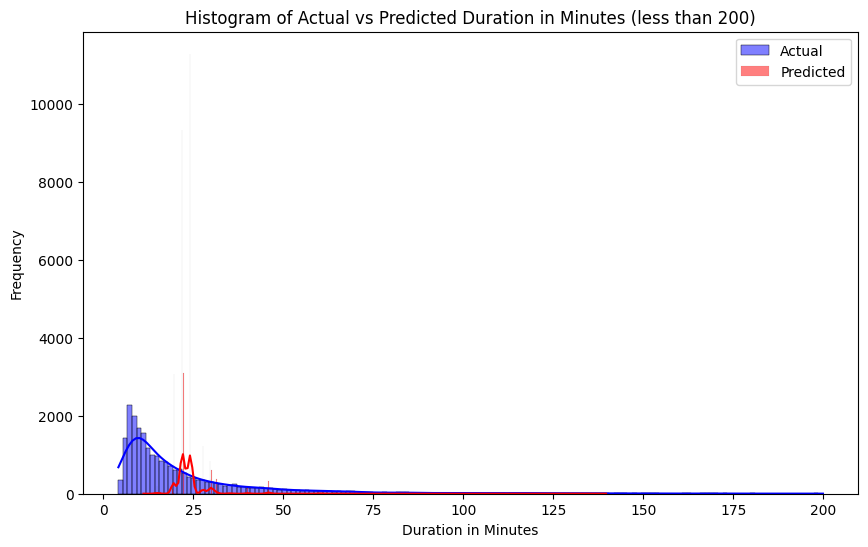

In [73]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train[df_train['duration_in_minutes'] < 200]['duration_in_minutes'], color='blue', label='Actual', kde=True)
sns.histplot(y_train_pred[y_train_pred < 200], color='red', label='Predicted', kde=True)
plt.xlabel('Duration in Minutes')
plt.ylabel('Frequency')
plt.title('Histogram of Actual vs Predicted Duration in Minutes (less than 200)')
plt.legend()
plt.show()

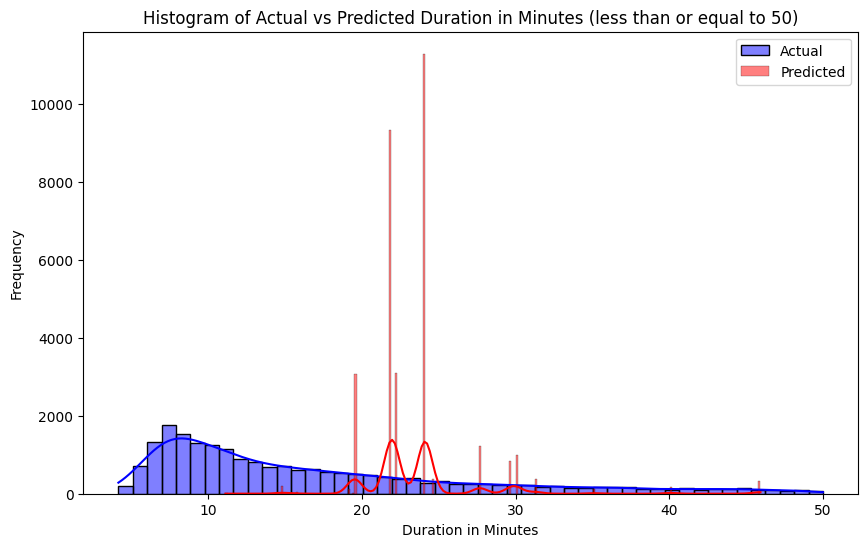

In [74]:
df_train_filtered = df_train[df_train['duration_in_minutes'] <= 50]
df_val_filtered = df_val[df_val['duration_in_minutes'] <= 50]

plt.figure(figsize=(10, 6))
sns.histplot(df_train_filtered['duration_in_minutes'], color='blue', label='Actual', kde=True)
sns.histplot(y_train_pred[y_train_pred <= 50], color='red', label='Predicted', kde=True)
plt.xlabel('Duration in Minutes')
plt.ylabel('Frequency')
plt.title('Histogram of Actual vs Predicted Duration in Minutes (less than or equal to 50)')
plt.legend()
plt.show()

In [75]:
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}")

Training RMSE: 25.0385
Testing RMSE: 25.0956
